# IE 360 Statistical Forecasting and Time Series
# Homework 2-3

We are interested in a predicting the tomorrow’s hourly electricity consumption
of Turkey (hourly estimation for each hour for the next 24 hours). The consumption series
are made taken from EPİAŞ. “Realized consumption” data is used.

In [3]:
install.packages("readxl")
library(readxl)
install.packages("stats")
library(stats)

Installing package into 'C:/Users/ataberk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'readxl' is in use and will not be installed"Installing package into 'C:/Users/ataberk/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

In [205]:
data <- read_excel("C:/Users/ataberk/Desktop/elekt.xlsx")

In [206]:
library(xts)

In [86]:
head(data)

Date,Hour,Consum
2016-01-01,1899-12-31 00:00:00,26277.24
2016-01-01,1899-12-31 01:00:00,24991.82
2016-01-01,1899-12-31 02:00:00,23532.61
2016-01-01,1899-12-31 03:00:00,22464.78
2016-01-01,1899-12-31 04:00:00,22002.91
2016-01-01,1899-12-31 05:00:00,21957.80


In [207]:
data$Hour<-substr(data$Hour,start=12,stop=19)

In [7]:
head(data)

Date,Hour,Consum
2016-01-01,00:00:00,26277.24
2016-01-01,01:00:00,24991.82
2016-01-01,02:00:00,23532.61
2016-01-01,03:00:00,22464.78
2016-01-01,04:00:00,22002.91
2016-01-01,05:00:00,21957.80


In [208]:
data$dateTime = as.POSIXct(paste(data$Date,data$Hour), format = "%Y-%m-%d %H:%M:%S")
dataxts <- xts(data$Consum, order.by=as.POSIXct(data$dateTime))
names(dataxts) <- "Hourly Consumption"
head(dataxts)

                    Hourly Consumption
2016-01-01 00:00:00           26277.24
2016-01-01 01:00:00           24991.82
2016-01-01 02:00:00           23532.61
2016-01-01 03:00:00           22464.78
2016-01-01 04:00:00           22002.91
2016-01-01 05:00:00           21957.80

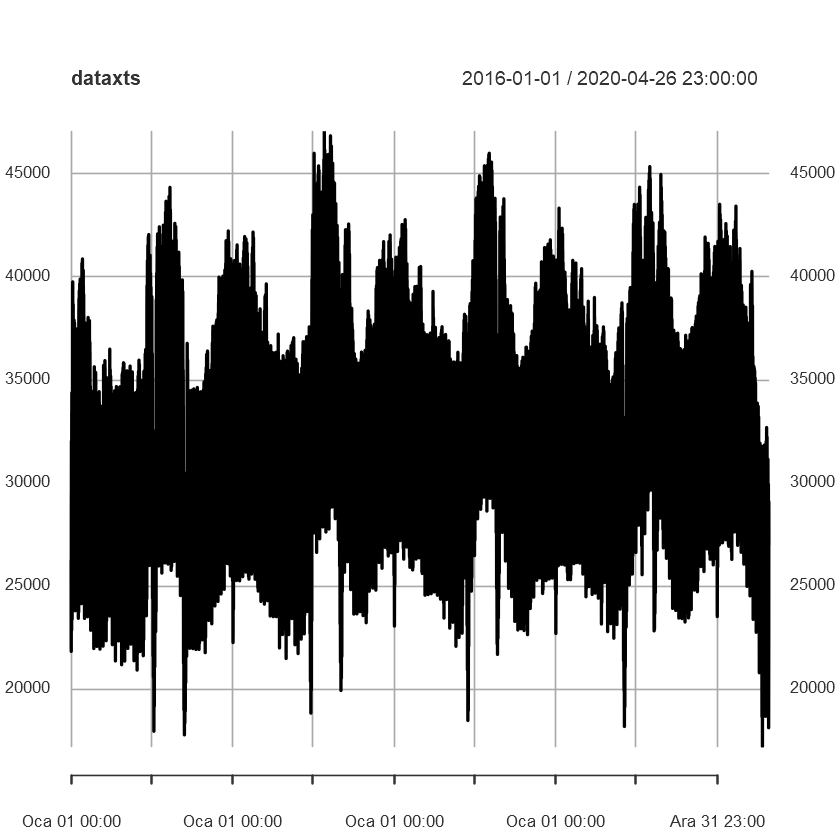

In [130]:
plot(dataxts)

It is hard to interpret results from this kind of plot. However there is something which is worth to mention. In every year there are two sharp bottom points. They refer to religious holidays, we can understand it from looking to dates. Also every year those points slides little bit which get along with religious holiday assumption.

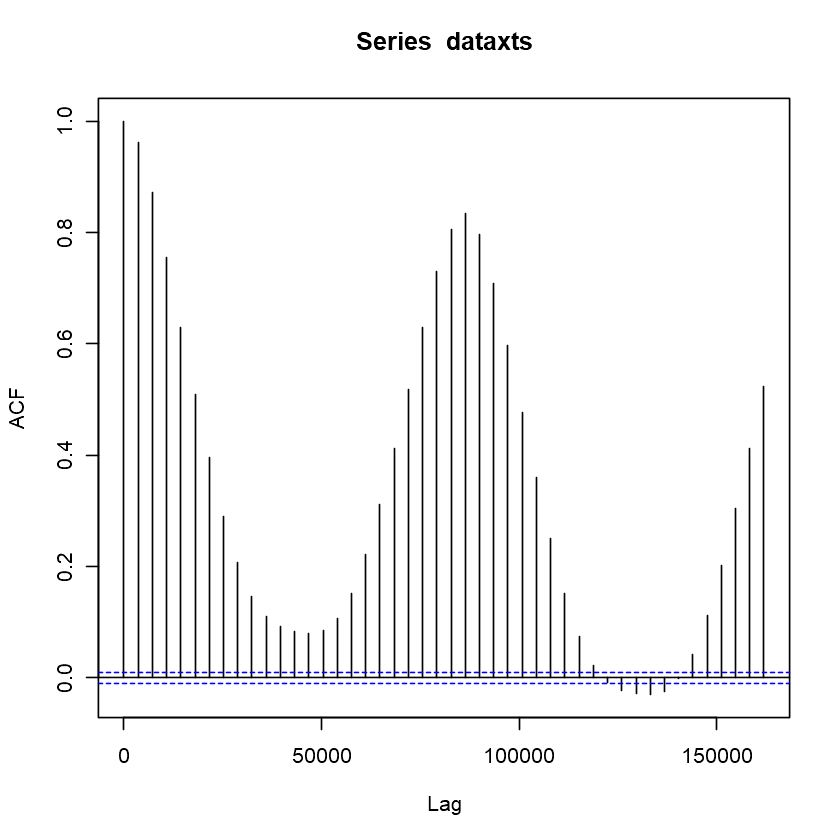

In [92]:
acf(dataxts)

As acf suggests there is a seasonality clearly, lets go deeper to find the seasonalities.

## Hourly Decomposition

Lets consider the case if there is a pattern in every 24 hours.

In [181]:
attr(dataxts, 'frequency') <- 24

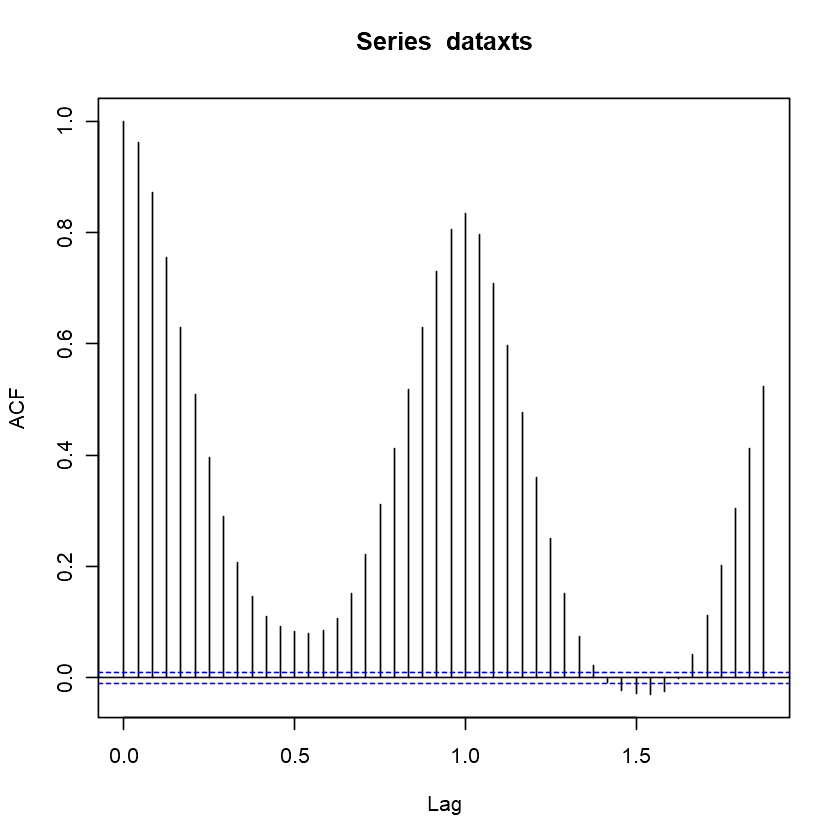

In [182]:
acf(dataxts)

We need to check if the data is composed of multiplicative elements or additive elements. We will observe the random noises variance in order to decide that. If there is a random variance in the random noise, this means we are good to go.


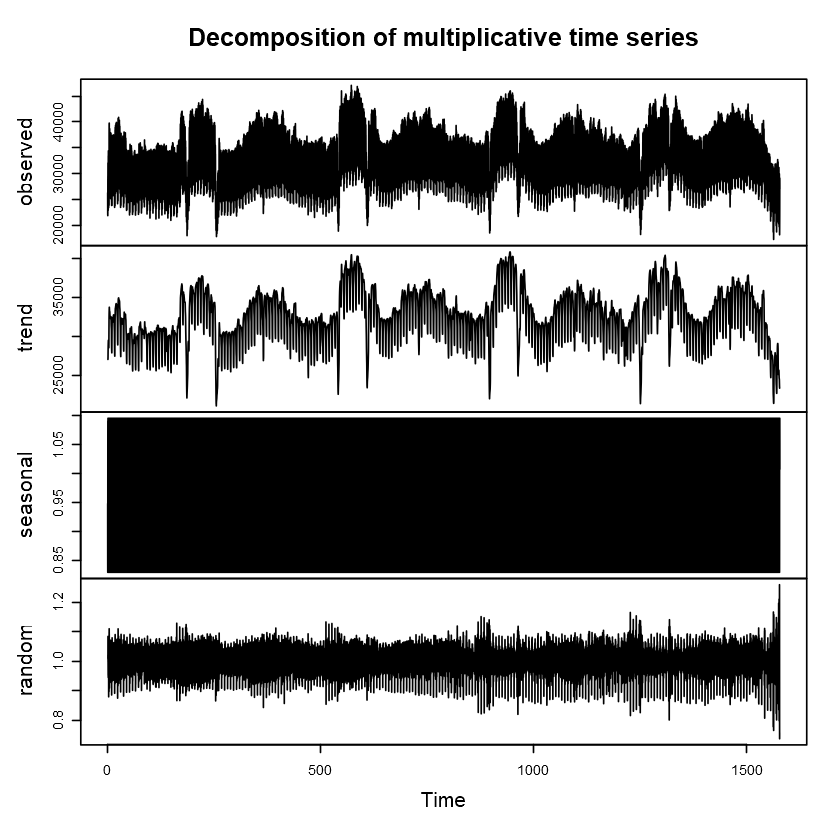

In [94]:
plot(decompose(as.ts(dataxts),type="multiplicative"))

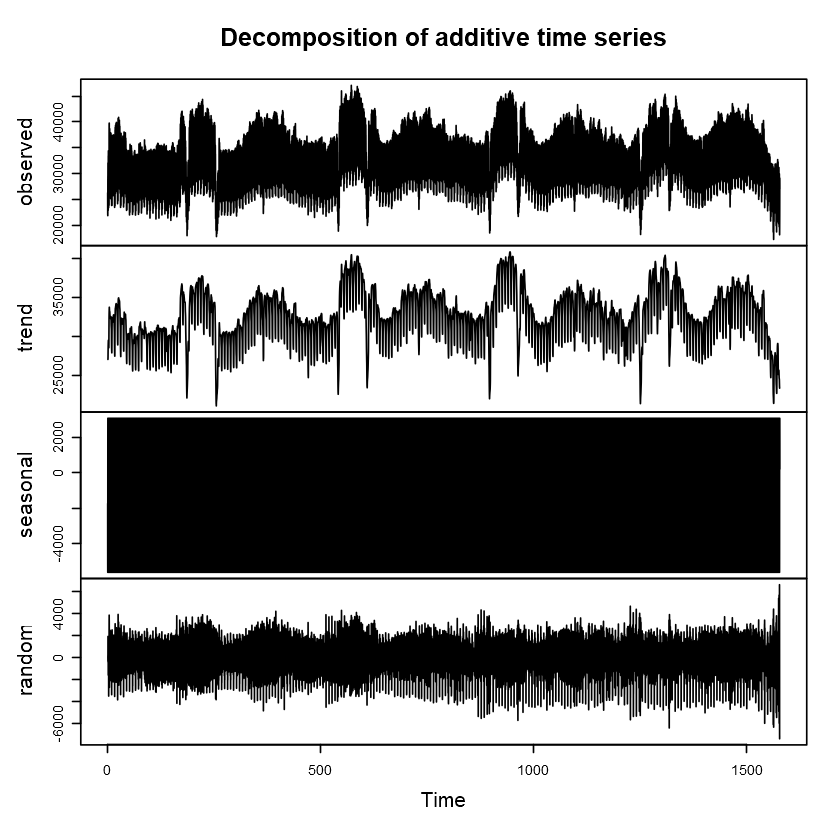

In [95]:
plot(decompose(as.ts(dataxts),type="additive"))

In [110]:
random <- na.omit(decompose(as.ts(dataxts),type="additive")$random)
randomm<- na.omit(decompose(as.ts(dataxts),type="multiplicative")$random)

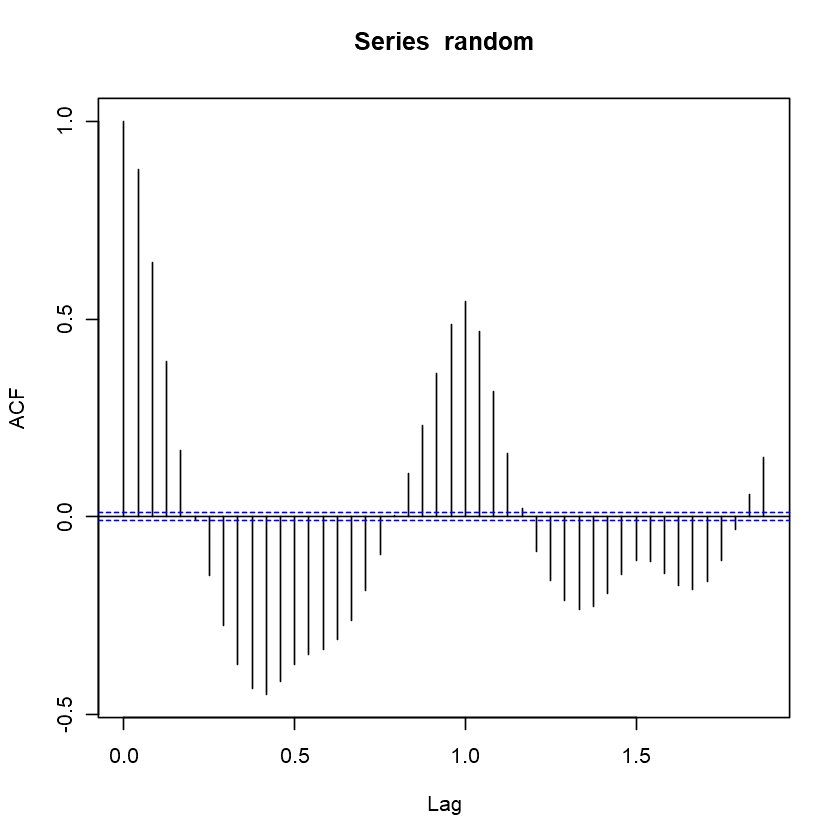

In [111]:
acf(random)

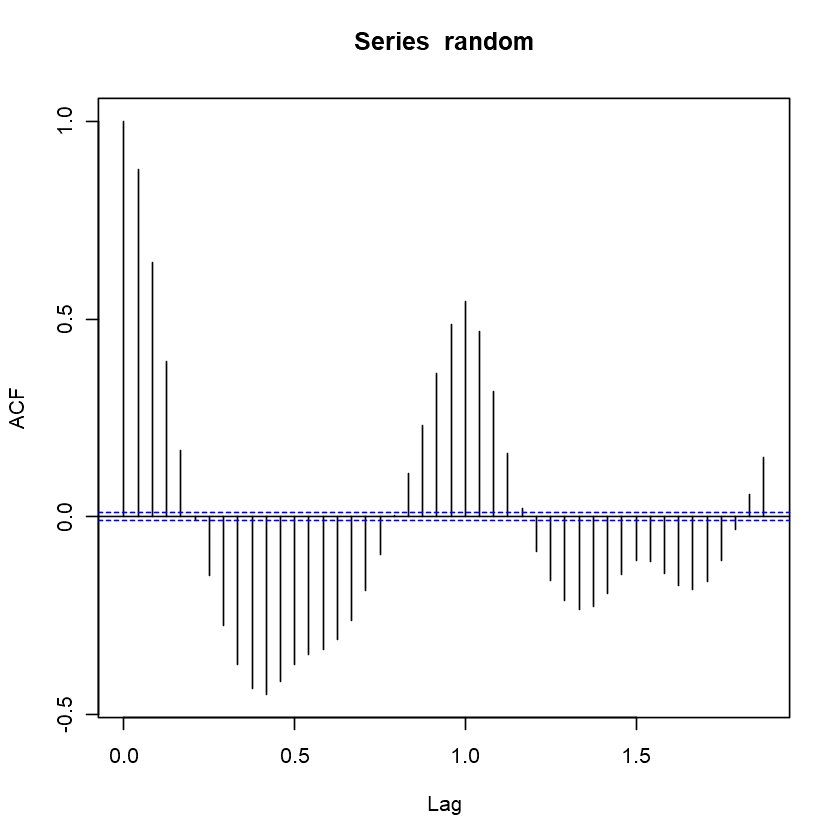

In [112]:
acf(random)

Clearly from the both acf there is still seasonality in the data. Therefore we will try different frequencies.

## Daily Decompose

In [209]:
ep <- endpoints(dataxts,'days')
dailydata<-period.apply(dataxts, INDEX=ep, FUN=sum)

In [210]:
attr(dailydata, 'frequency') <- 7

In [211]:
names(dailydata) <- "Daily Consumption"
head(dailydata,20)

                    Daily Consumption
2016-01-01 23:00:00          648691.3
2016-01-02 23:00:00          702609.3
2016-01-03 23:00:00          685454.6
2016-01-04 23:00:00          794907.1
2016-01-05 23:00:00          796750.6
2016-01-06 23:00:00          783230.2
2016-01-07 23:00:00          780834.5
2016-01-08 23:00:00          775536.6
2016-01-09 23:00:00          748705.8
2016-01-10 23:00:00          675376.5
2016-01-11 23:00:00          763342.6
2016-01-12 23:00:00          764874.4
2016-01-13 23:00:00          774587.4
2016-01-14 23:00:00          784067.4
2016-01-15 23:00:00          781958.3
2016-01-16 23:00:00          746281.5
2016-01-17 23:00:00          663658.7
2016-01-18 23:00:00          780845.5
2016-01-19 23:00:00          809197.4
2016-01-20 23:00:00          819195.2

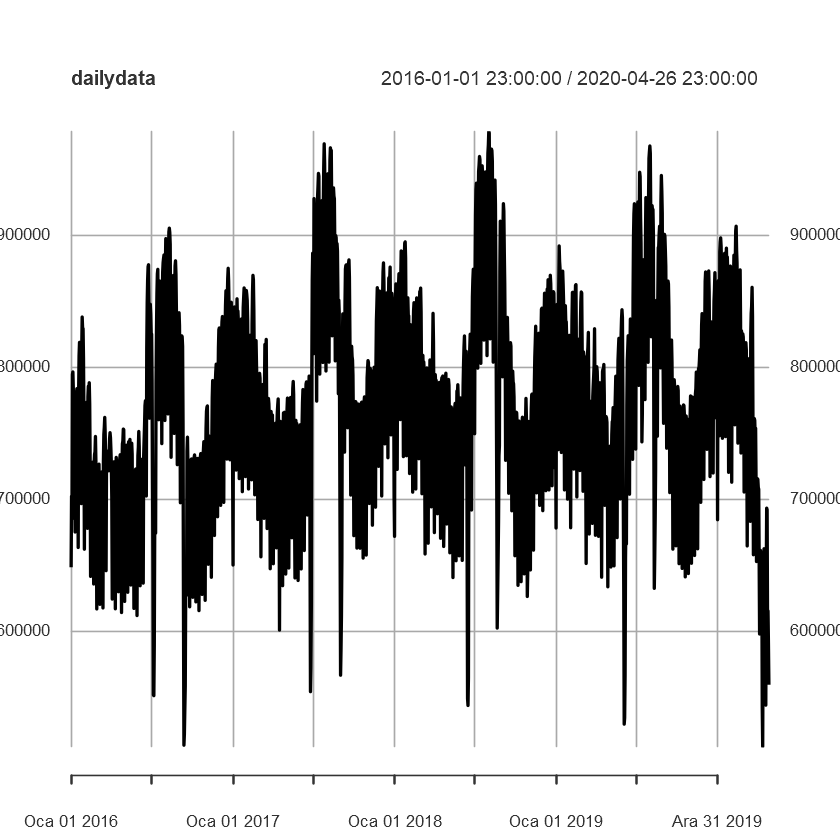

In [136]:
plot(dailydata)

Again we can see the effects of the holidays.

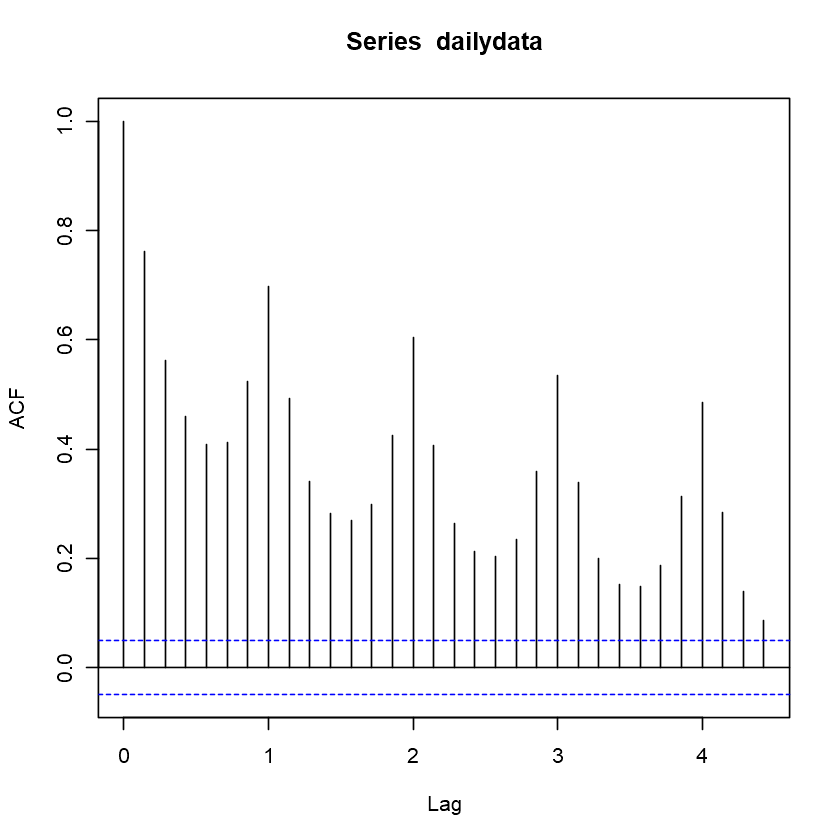

In [137]:
acf(dailydata)

As again, acf indicates there is a seasonality lets try to find the seasonality.

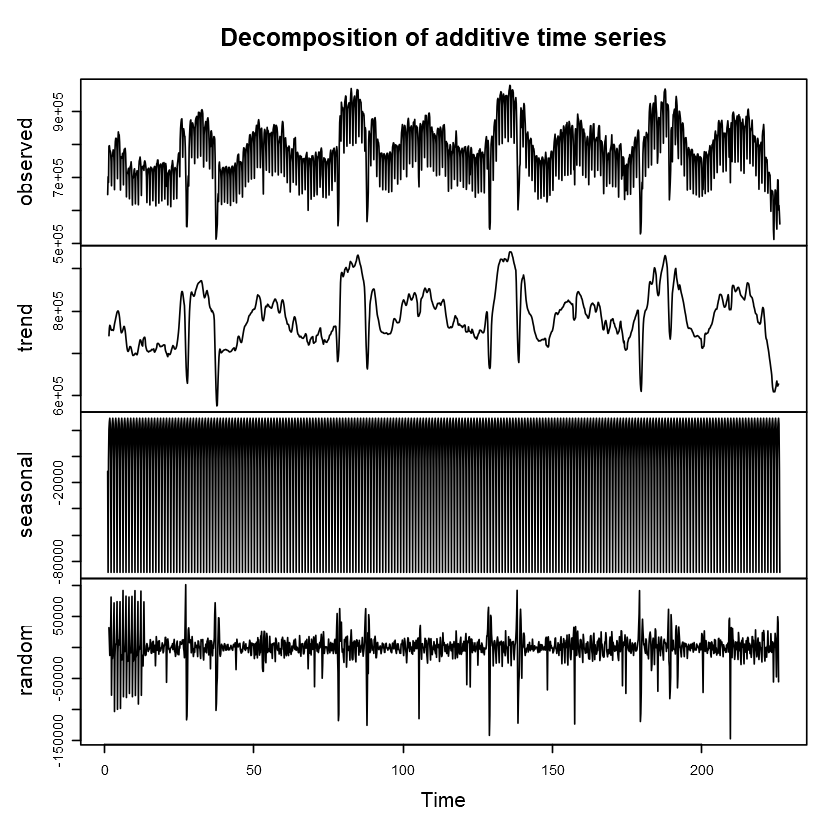

In [138]:
plot(decompose(as.ts(dailydata),type="additive"))

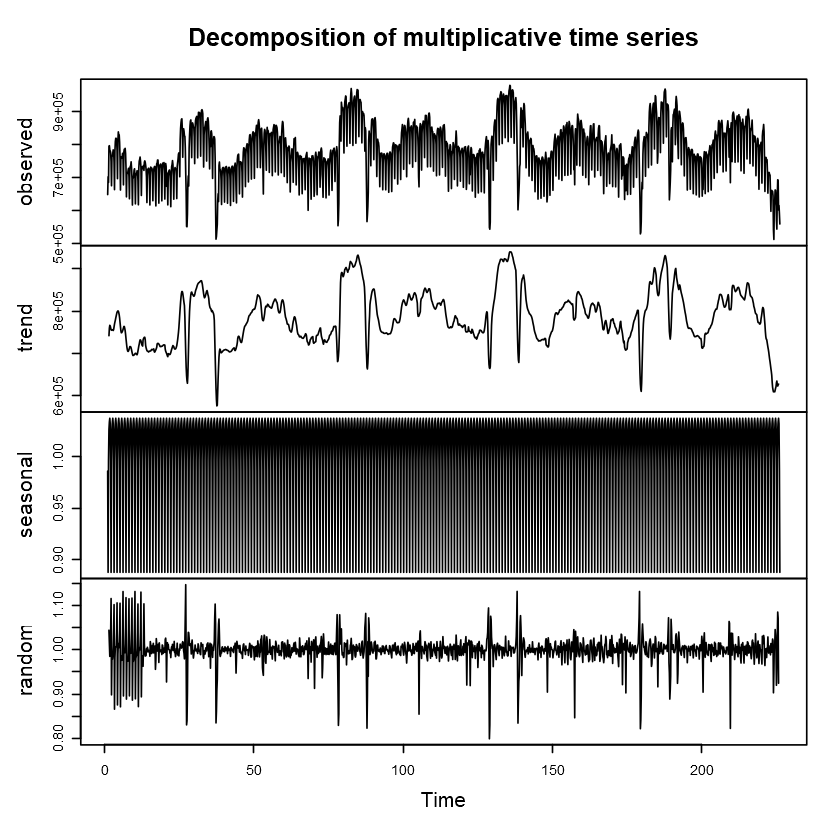

In [140]:
plot(decompose(as.ts(dailydata),type="multiplicative"))

Trend looks different then ordinary. This is a indicator of a seasonality that decompose function could not catch.

In [141]:
random <- na.omit(decompose(as.ts(dailydata),type="additive")$random)
randomm<- na.omit(decompose(as.ts(dailydata),type="multiplicative")$random)

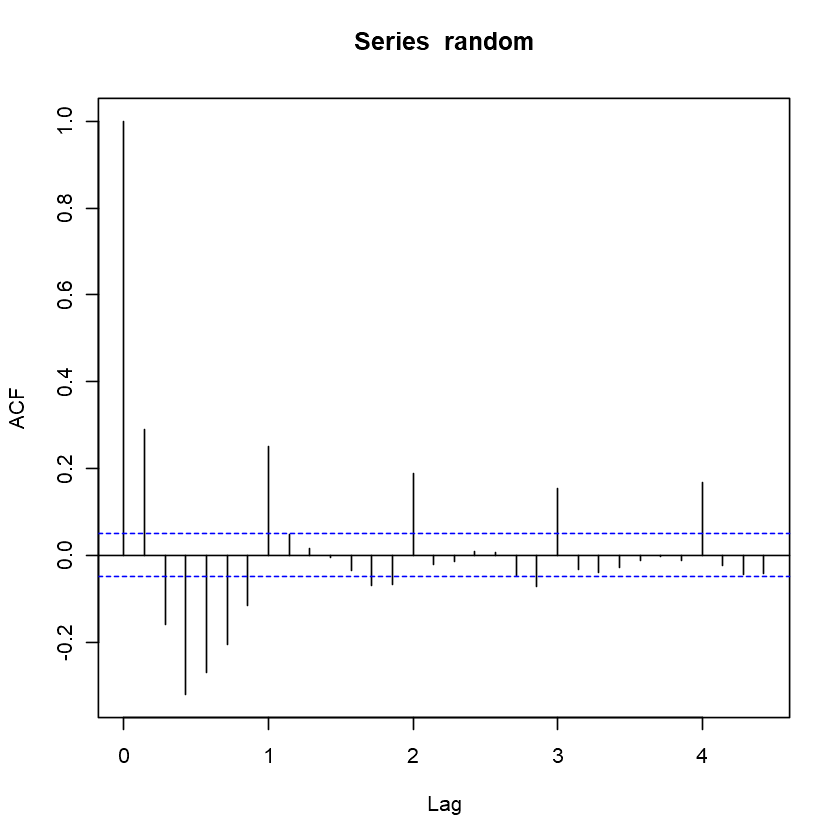

In [142]:
acf(random)

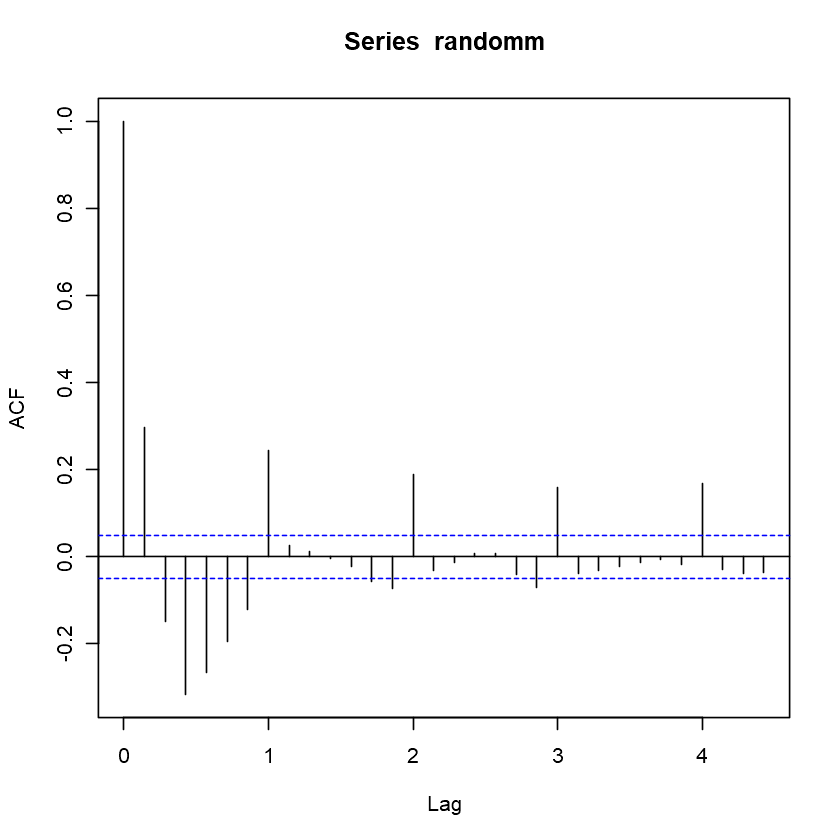

In [144]:
acf(randomm)

There are still autocorrelations in both figures. This means random component is not white noise. Therefore, we are missing some seasonality in this frequency. However, this better than hourly seasonality.


   ## Weekly Decomposition

In [212]:
ep <- endpoints(dailydata,'weeks')
weeklydata<-period.apply(dailydata, INDEX=ep, FUN=sum)
attr(weeklydata, 'frequency') <- 52
names(weeklydata) <- "Weekly Consumption"
head(weeklydata)
tail(weeklydata)

                    Weekly Consumption
2016-01-03 23:00:00            2036755
2016-01-10 23:00:00            5355341
2016-01-17 23:00:00            5278770
2016-01-24 23:00:00            5520638
2016-01-31 23:00:00            5539326
2016-02-07 23:00:00            5258350

                    Weekly Consumption
2020-03-22 23:00:00            5628042
2020-03-29 23:00:00            5132961
2020-04-05 23:00:00            4806611
2020-04-12 23:00:00            4339581
2020-04-19 23:00:00            4324034
2020-04-26 23:00:00            4392849

I will drop the first observation, since data begins from 1th of January, only 3 dates are added as week. This will create a noise in data, removing it from the data will give us better vision on data.

In [213]:
weeklydata <- weeklydata[-1,]

In [214]:
head(weeklydata)

                    Weekly Consumption
2016-01-10 23:00:00            5355341
2016-01-17 23:00:00            5278770
2016-01-24 23:00:00            5520638
2016-01-31 23:00:00            5539326
2016-02-07 23:00:00            5258350
2016-02-14 23:00:00            5277810

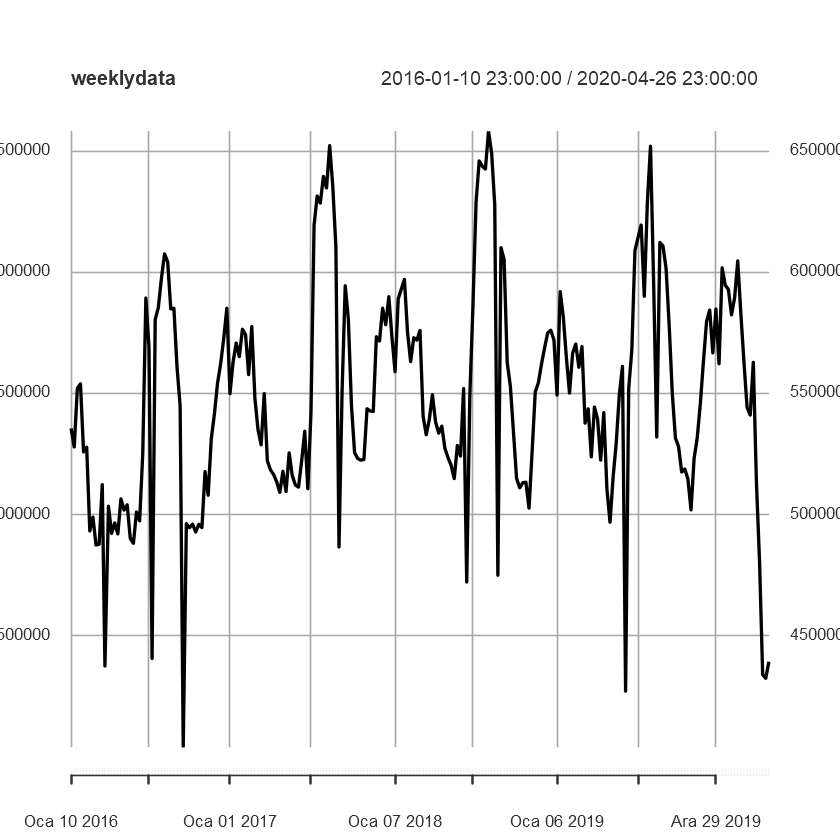

In [156]:
plot(weeklydata)

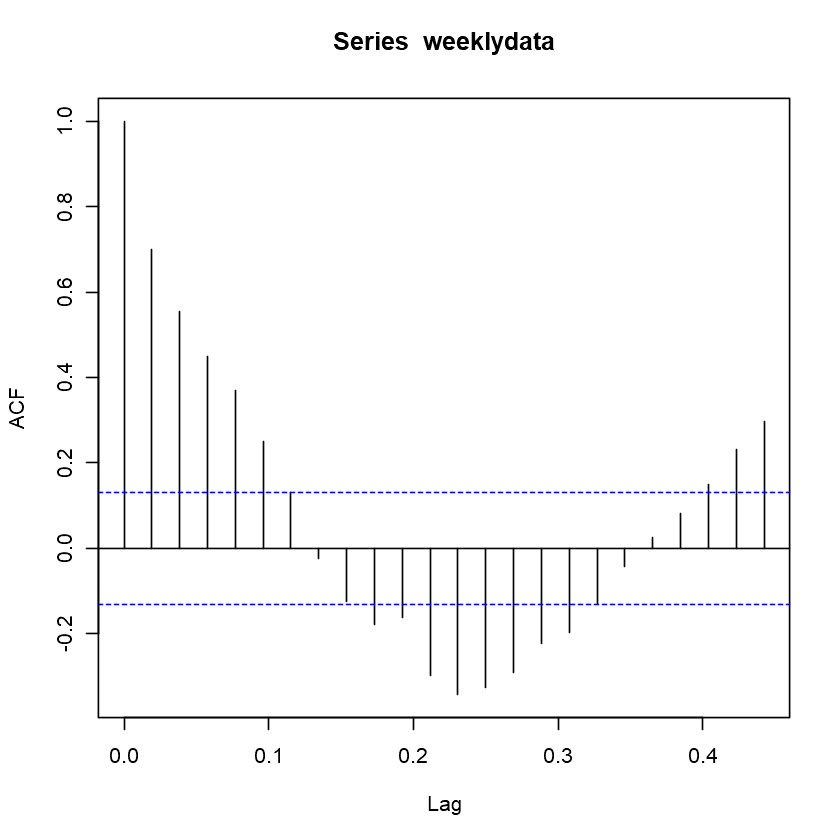

In [157]:
acf(weeklydata)

Clearly, there is seasonality. 

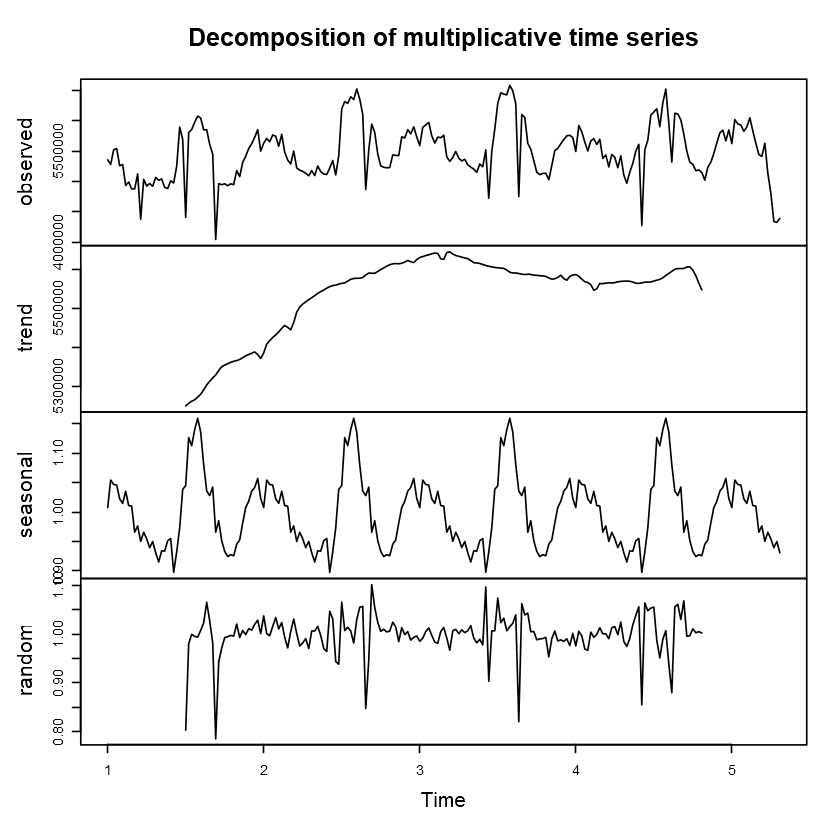

In [215]:
plot(decompose(as.ts(weeklydata),type="multiplicative"))

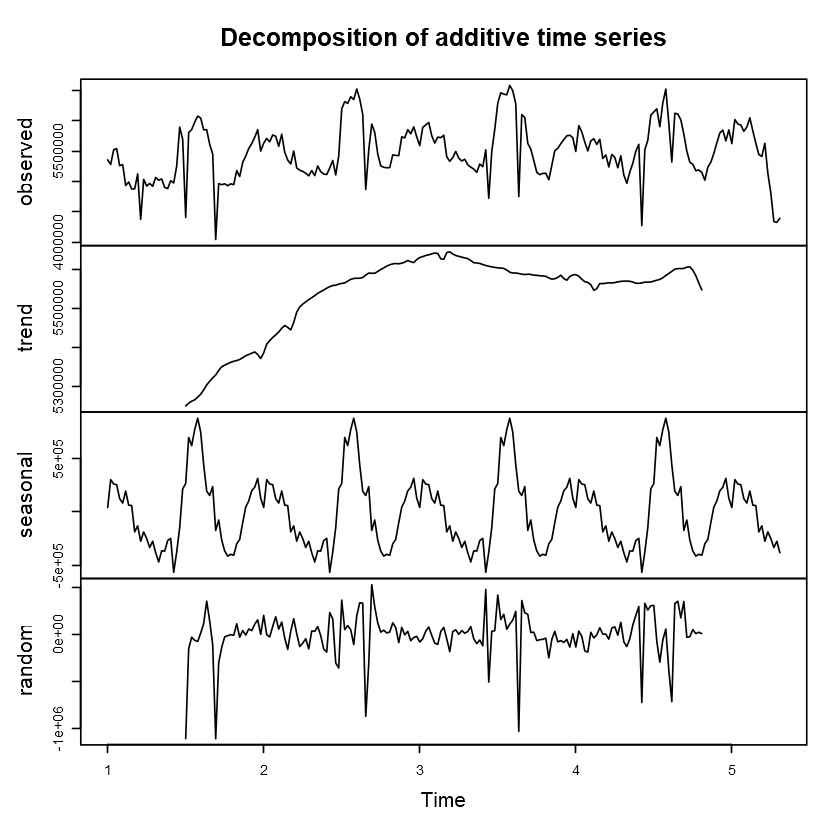

In [159]:
plot(decompose(as.ts(weeklydata),type="additive"))

In [216]:
random <- na.omit(decompose(as.ts(weeklydata),type="additive")$random)
randomm<- na.omit(decompose(as.ts(weeklydata),type="multiplicative")$random)

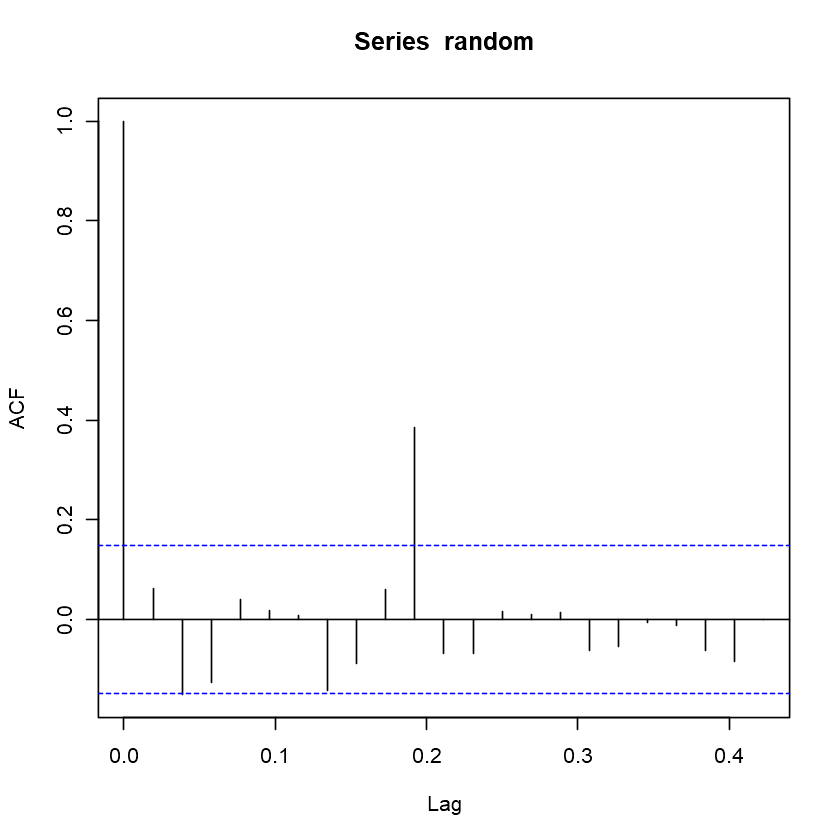

In [217]:
acf(random)

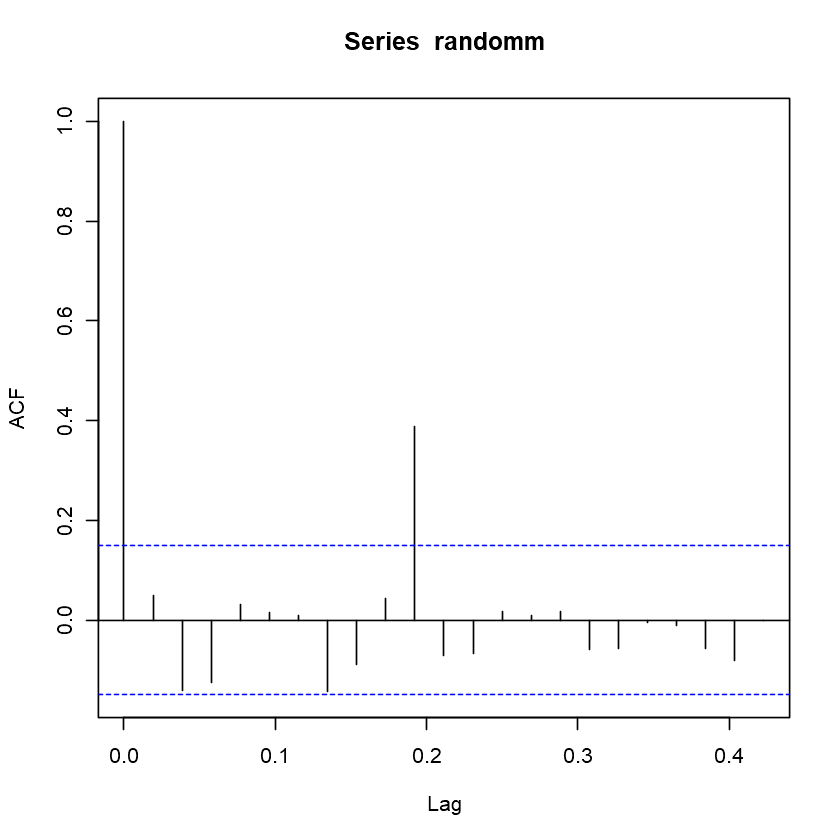

In [218]:
acf(randomm)

We get rid of most of the autocorrelation. However there is still autocorrelation in the random data. Still better than hourly and daily decompososition.

## Monthly decompose

In [219]:
ep <- endpoints(dailydata,'month')
monthlydata<-period.apply(dailydata, INDEX=ep, FUN=sum)
attr(monthlydata, 'frequency') <- 12
names(monthlydata) <- "Monthly Consumption"
head(monthlydata)
tail(monthlydata)

                    Monthly Consumption
2016-01-31 23:00:00            23730831
2016-02-29 23:00:00            21153188
2016-03-31 23:00:00            21535405
2016-04-30 23:00:00            21301857
2016-05-31 23:00:00            21900338
2016-06-30 23:00:00            23051283

                    Monthly Consumption
2019-11-30 23:00:00            23085346
2019-12-31 23:00:00            25518001
2020-01-31 23:00:00            26173645
2020-02-29 23:00:00            24213553
2020-03-31 23:00:00            23740178
2020-04-26 23:00:00            16442304

I will drop the last observation, since last observation doesn't cover a full month. This will create a noise in data, removing it from the data will give us better vision on data.

In [220]:
monthlydata<-monthlydata[-nrow(monthlydata),]

In [169]:
tail(monthlydata)

                    Monthly Consumption
2019-10-31 23:00:00            22890268
2019-11-30 23:00:00            23085346
2019-12-31 23:00:00            25518001
2020-01-31 23:00:00            26173645
2020-02-29 23:00:00            24213553
2020-03-31 23:00:00            23740178

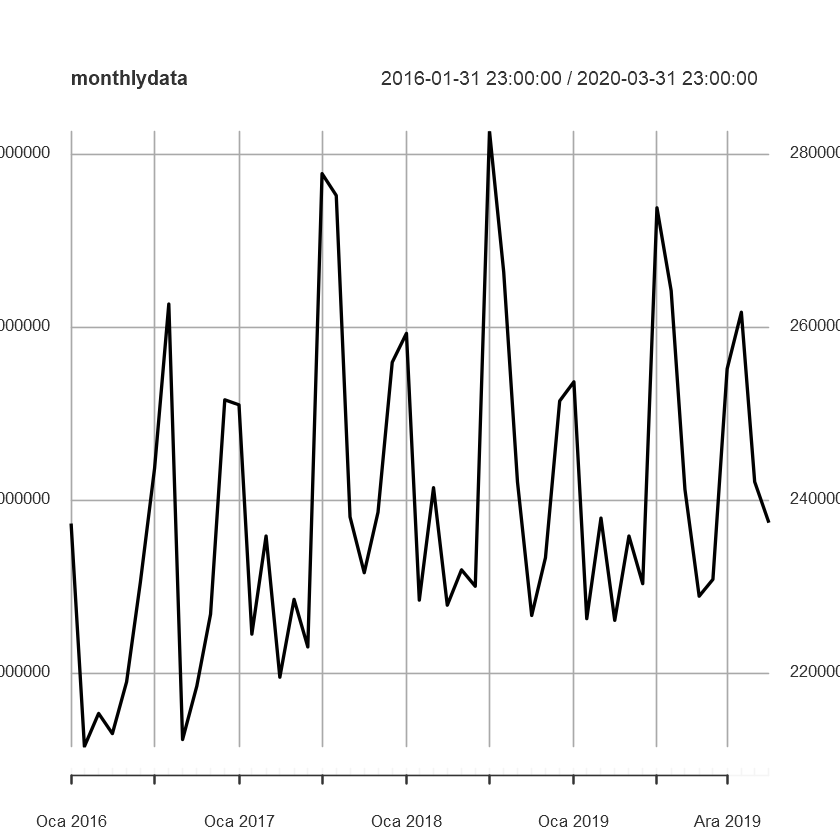

In [221]:
plot(monthlydata)

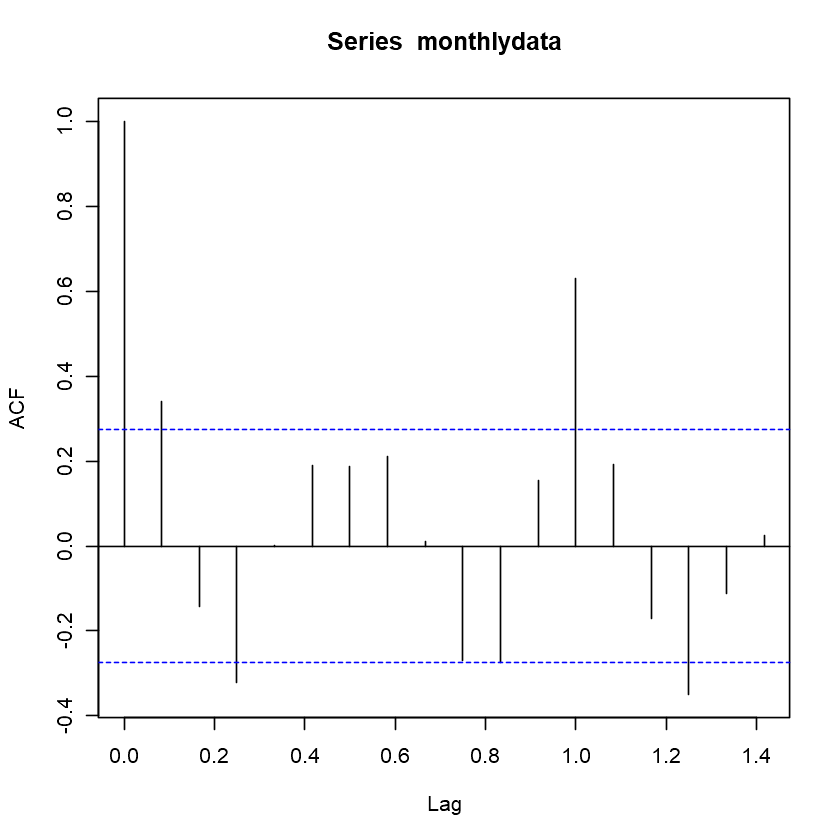

In [222]:
acf(monthlydata)

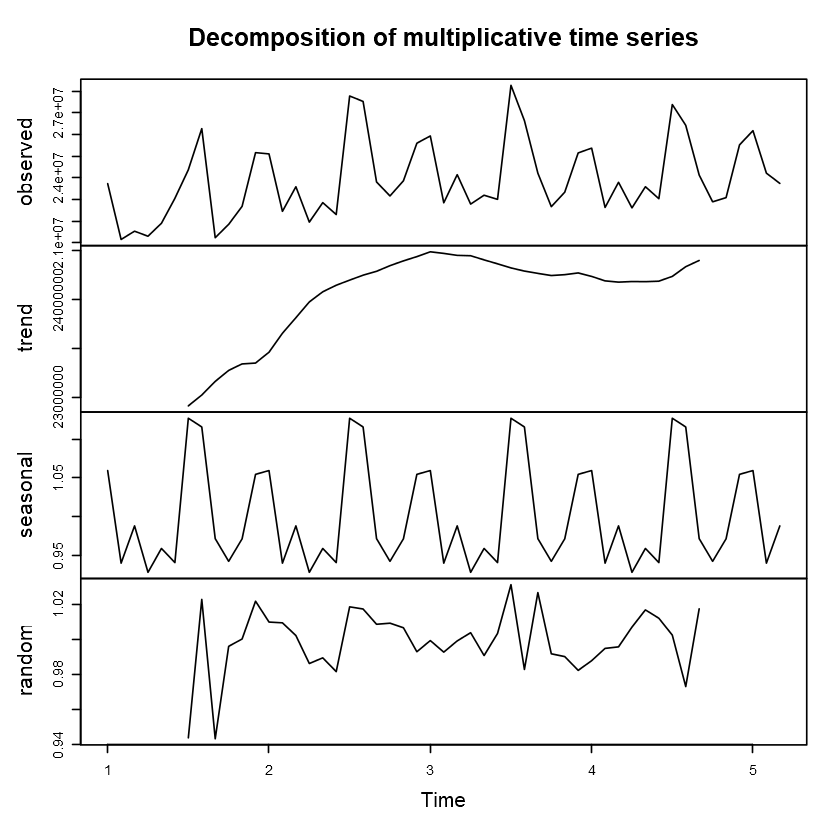

In [223]:
plot(decompose(as.ts(monthlydata),type="multiplicative"))

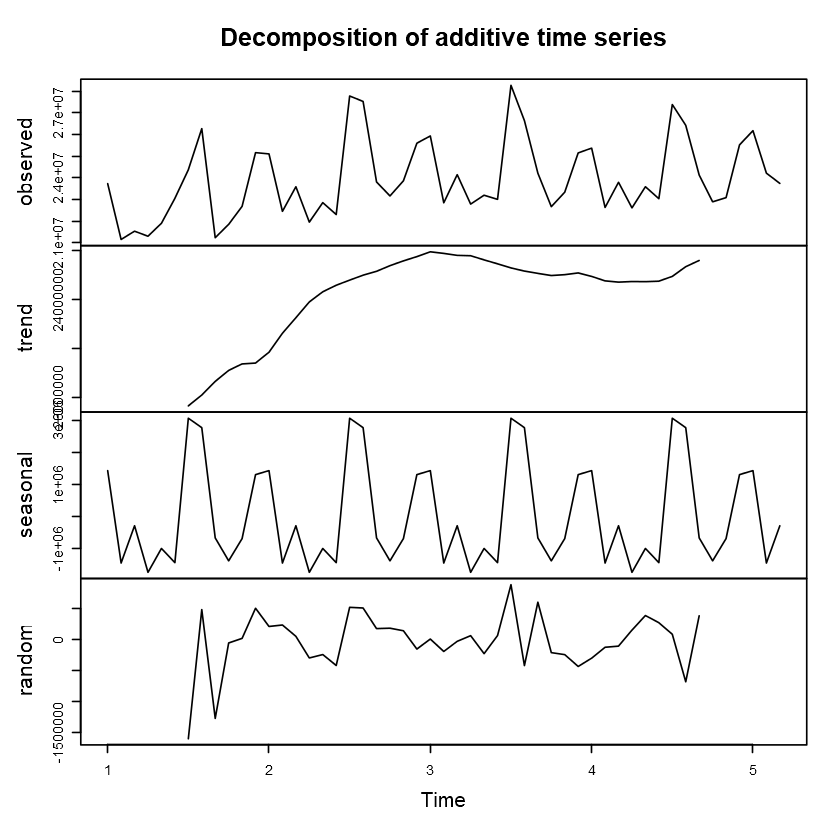

In [224]:
plot(decompose(as.ts(monthlydata),type="additive"))

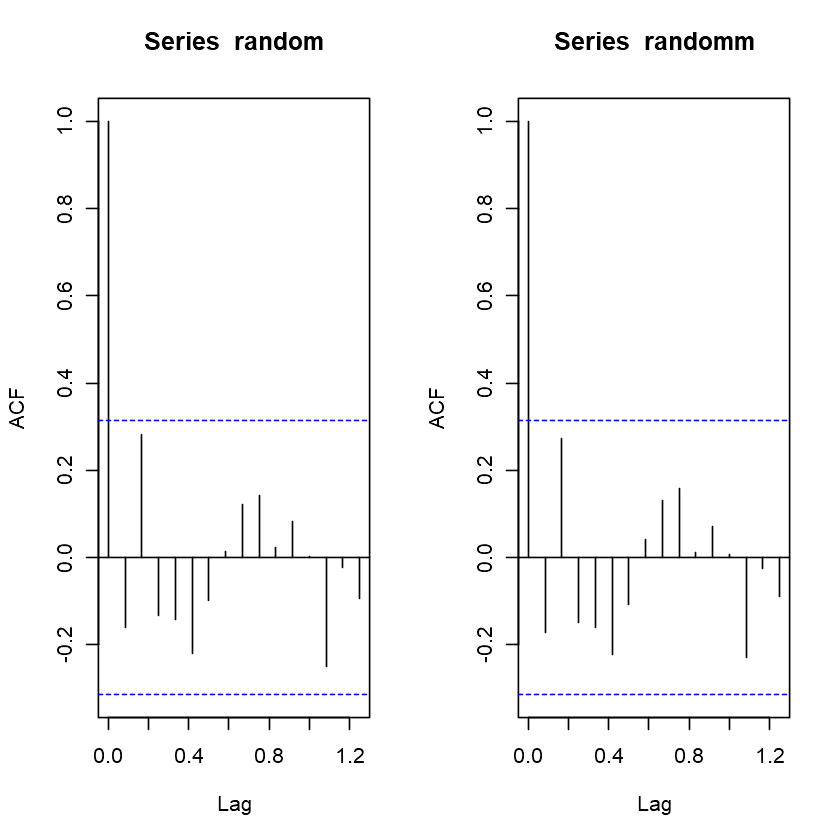

In [225]:
random <- na.omit(decompose(as.ts(monthlydata),type="additive")$random)
randomm<- na.omit(decompose(as.ts(monthlydata),type="multiplicative")$random)
par(mfrow=c(1,2))
acf(random)
acf(randomm)

There is no strong autocorrelation in the acf function. Therefore, we can suggest that random is a whitenoise which means our decomposetion is best in monthly data.

## Comment on findings

There is trend on data, we can clearly see it from every plot chart however, it is easier and better to interpret from the monthly data. As monthly data suggests, trend increased for a while and it is nearly constant for a while. Seasonal component suggest that consumptions peaks in every month of a year then drops down again. There can be possible reasons for that, first reason can be weather conditions or sunlight time in every month. As season changes in the country, electric consumption will change regardly.

# Task 2

As supposed in the question, we think there is a pattern every 168 hours.

In [9]:
attr(dataxts, 'frequency') <- 168

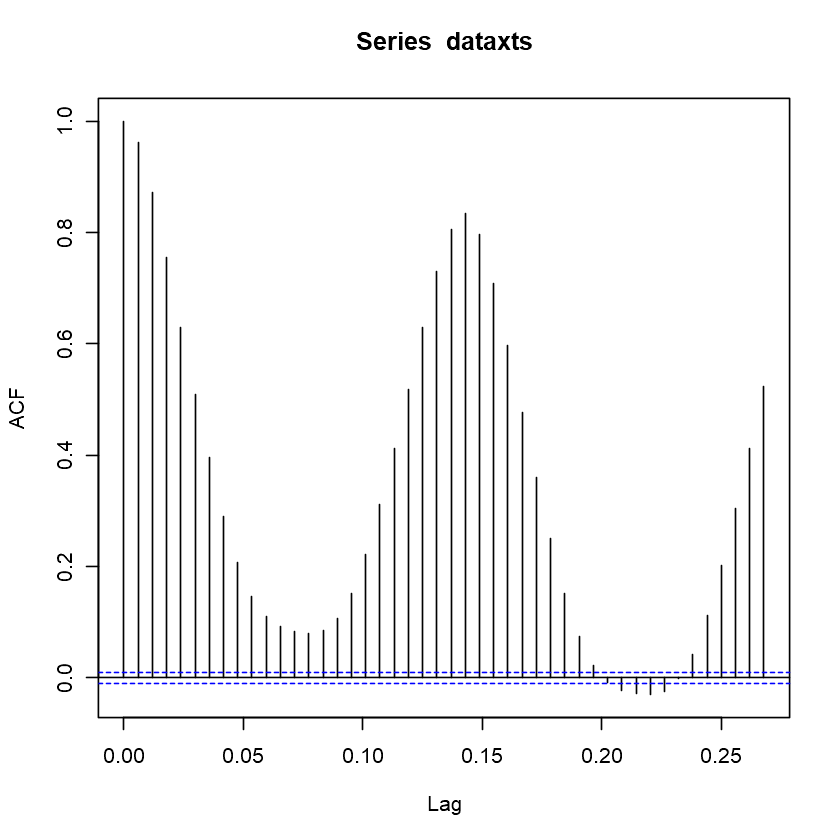

In [180]:
acf(dataxts)

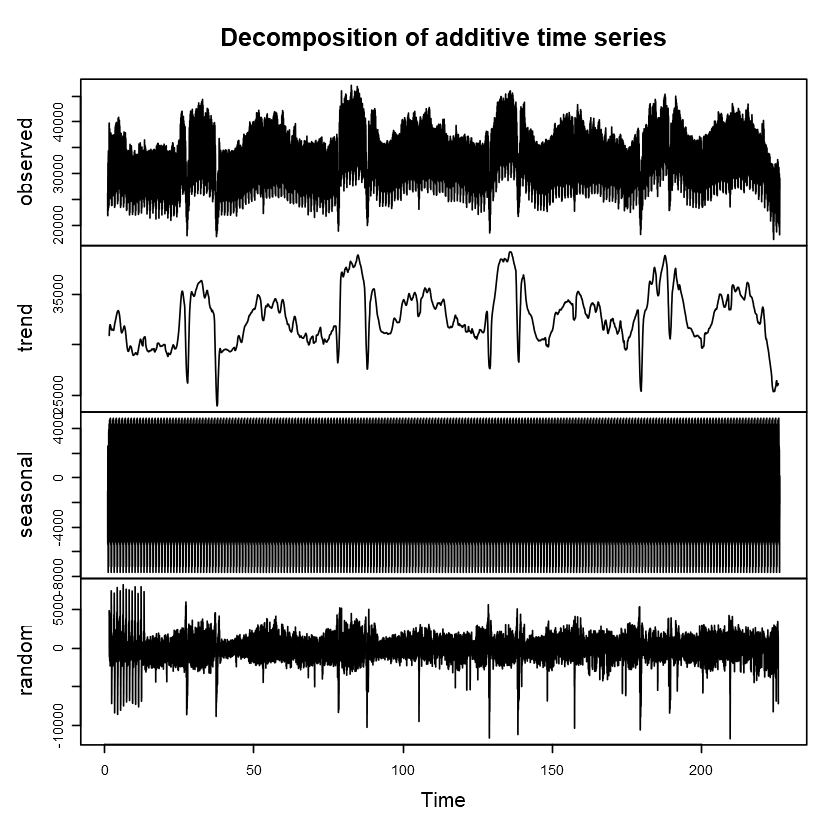

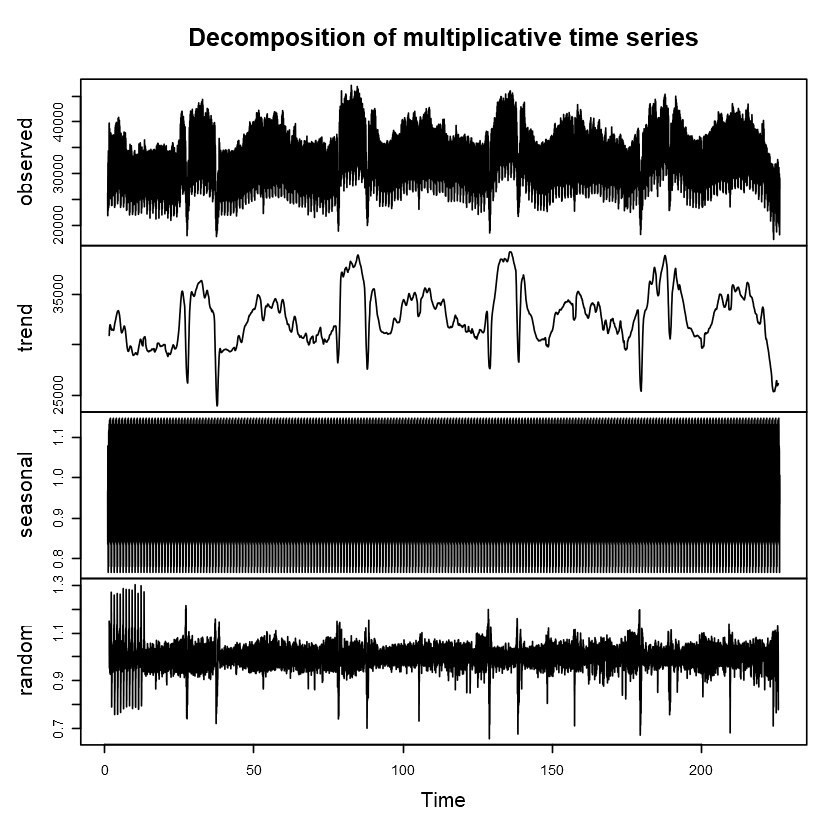

In [179]:
par(mfrow=c(1,2))
plot(decompose(as.ts(dataxts),type="additive"))
plot(decompose(as.ts(dataxts),type="multiplicative"))

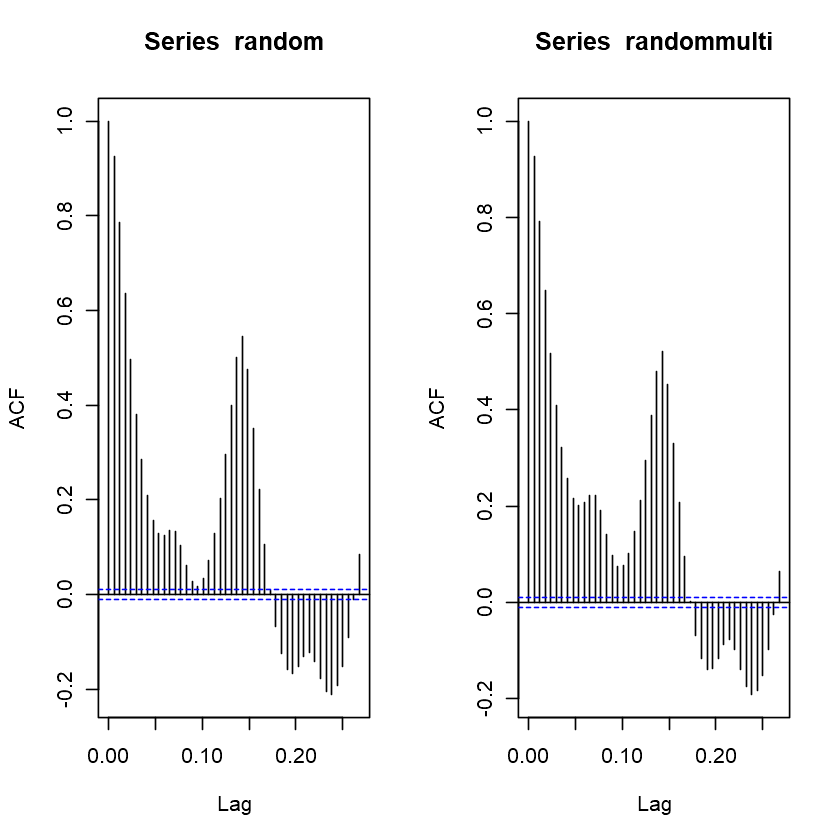

In [11]:
random <- na.omit(decompose(as.ts(dataxts),type="additive")$random)
randommulti<- na.omit(decompose(as.ts(dataxts),type="multiplicative")$random) # for the sake of simplicity I omitted NA's
par(mfrow=c(1,2))
acf(random)
acf(randommulti)

Variance is not constant, however as the question supposed we will go with this frequency.

I will continue with multiplicative model. Decompose works like this; 
$Observed / (Trend * Seasonal) = Random$ .Therefore modelling on the  $Random data is same as detrended and deasonalized observed data. However there are NA values in trend data which causes NA's in random. NA's will be replaced with the most recent Non NA value.

In [48]:
seasonal <- decompose(as.ts(dataxts),type="multiplicative")$seasonal
trend <- decompose(as.ts(dataxts),type="multiplicative")$trend
random <- decompose(as.ts(dataxts),type="multiplicative")$random

In [49]:
tail(trend,85)

[1] 26143.9      NA      NA      NA      NA      NA      NA      NA      NA
[10]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[19]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[28]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[37]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[46]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[55]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[64]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[73]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[82]      NA      NA      NA      NA

In [50]:
trend <- na.locf(trend)
tail(trend,85)

[1] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[10] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[19] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[28] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[37] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[46] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[55] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[64] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[73] 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9 26143.9
[82] 26143.9 26143.9 26143.9 26143.9

In [52]:
random <- as.ts(dataxts)/(trend*seasonal)

New random is calculated since there were some NA's in the last random.

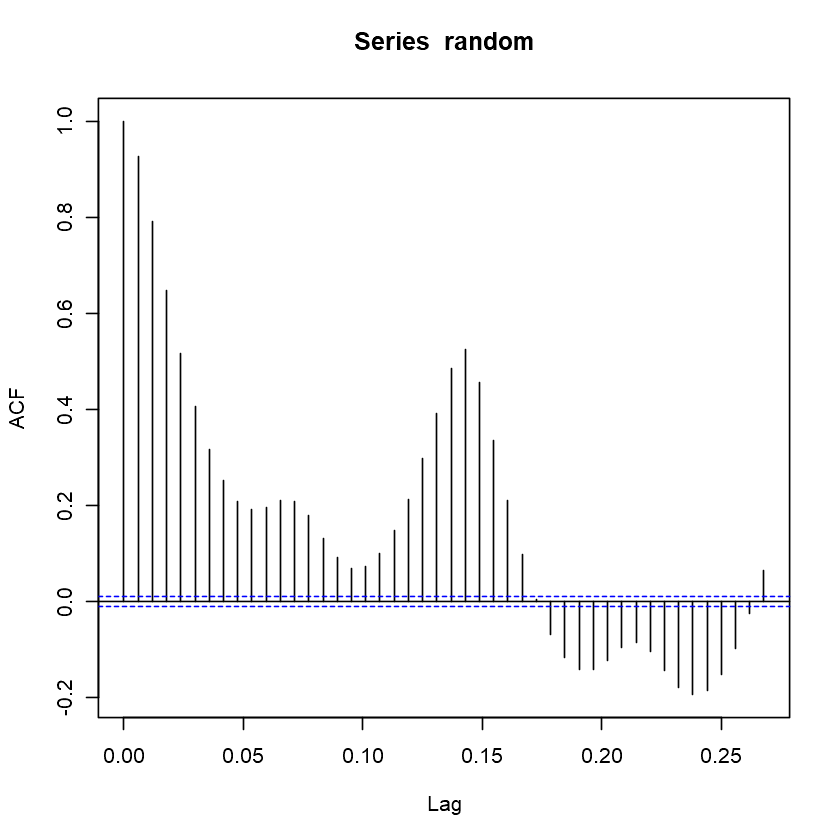

In [56]:
acf(random)

There is still seasonality however question suggested us to use it.

# TASK 3-4

In [66]:
vector <- c()
for (i in 1:10){
model <- arima(random, order=c(i,0,0))
vector<-c(vector,model$aic)}

[1] -200474.4 -210796.0 -211024.2 -211085.4 -211161.5 -211168.3 -211210.9
 [8] -211296.8 -211568.4 -211651.8

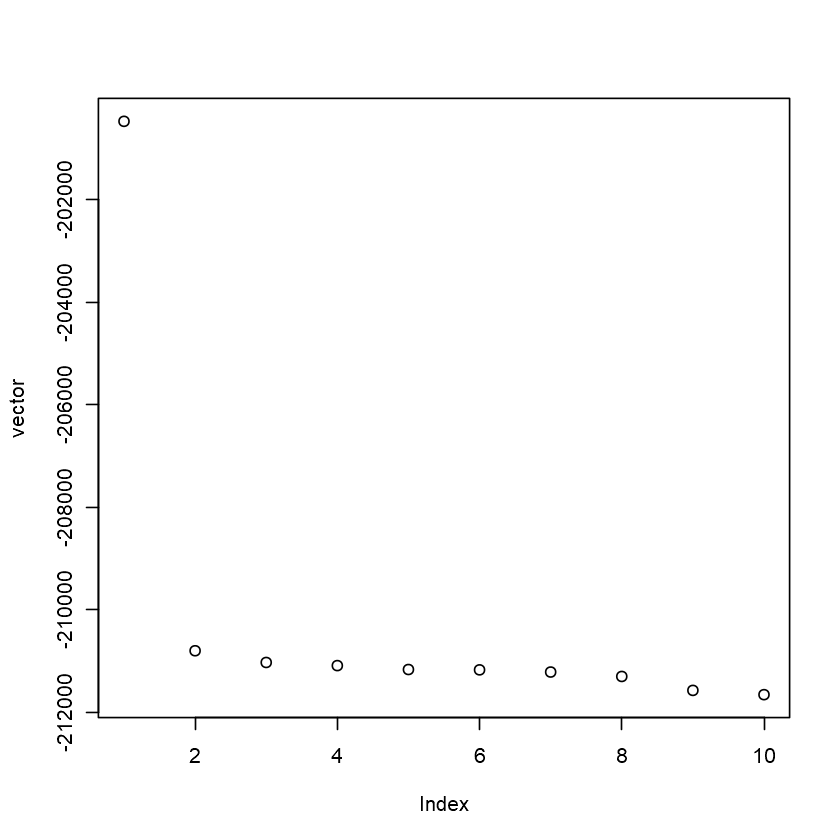

In [67]:
plot(vector)
vector

As my computation power allows me, I just tried lag from 1 to 10. Better models can be found if there is more computation power. As AIC suggest, i will use the lowest value AIC which is given by lag(10).

In [62]:
vectorma <- c()
for (i in 1:10){
model <- arima(random, order=c(0,0,i))
vectorma<-c(vectorma,model$aic)}

[1] -167655.8 -189099.8 -200397.5 -205315.3 -208583.2 -209484.5 -210168.8
 [8] -210700.0 -211667.1 -211830.1

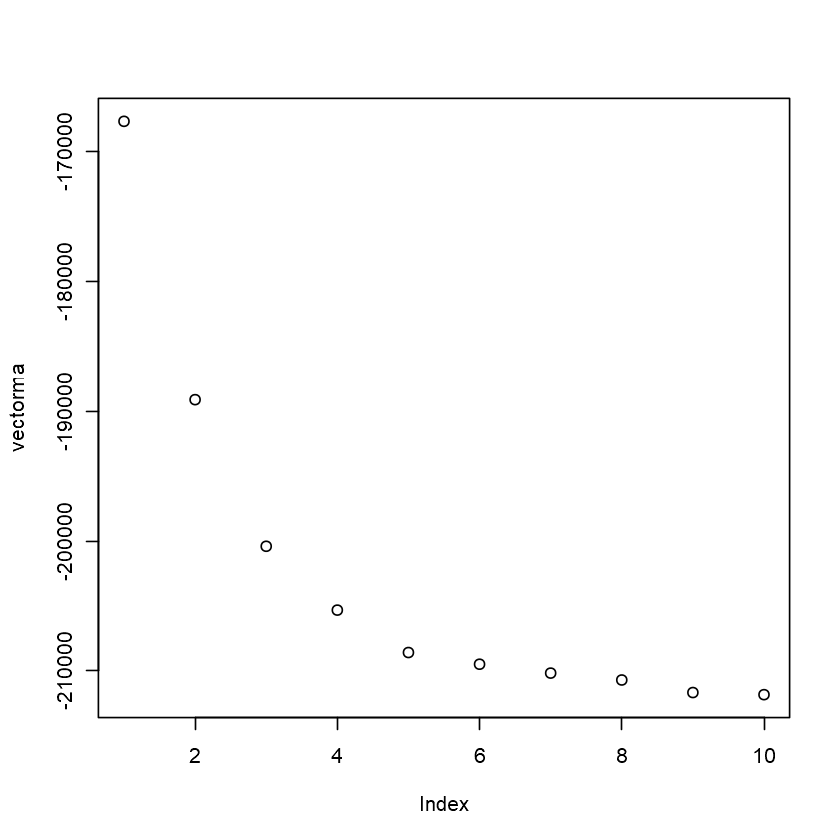

In [64]:
plot(vectorma)
vectorma

As my computation power allows me, I just tried lag from 1 to 10. Better models can be found if there is more computation power. As AIC suggest, i will use the lowest AIC value which is given by MA(10).

## TASK 5

As AIC suggests, MA(10) model is slightly better than AR(10) model.

In [203]:
last_trend <- last(trend)
last_seasonal <- last(seasonal)

In [68]:
modelar <- arima(random, order=c(10,0,0))
modelma <- arima(random, order=c(0,0,10))

In [194]:
ts<-ts(dataxts["2020-04-01 00:00:00/"], start = c(222, 98),frequency=168 )

Manipulating series in order to get better plot.

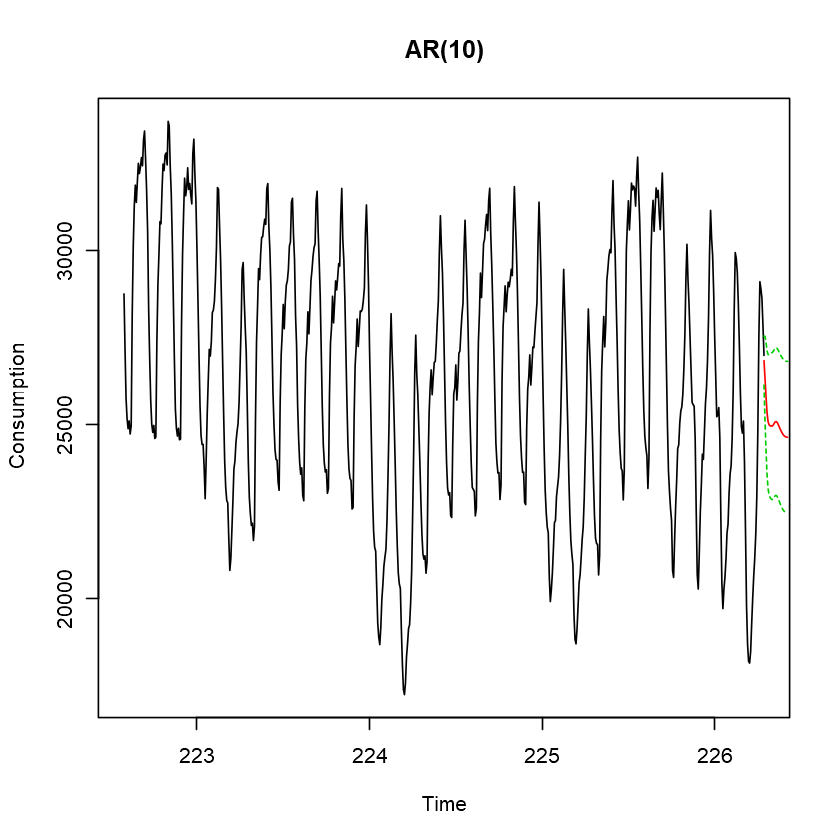

In [201]:
modelarforecast <- predict(modelar, n.ahead = 24)$pred
modelarse <- predict(modelar, n.ahead = 24)$se
ts.plot(ts,ylab = "Consumption",main="AR(10)")
points(modelarforecast*last_trend*last_seasonal, type = "l", col = 2)
points(modelarforecast*last_trend*last_seasonal - 1.96*modelarse*last_trend*last_seasonal, type = "l", col = 3, lty = 2)
points(modelarforecast*last_trend*last_seasonal + 1.96*modelarse*last_trend*last_seasonal, type = "l", col = 3, lty = 2)

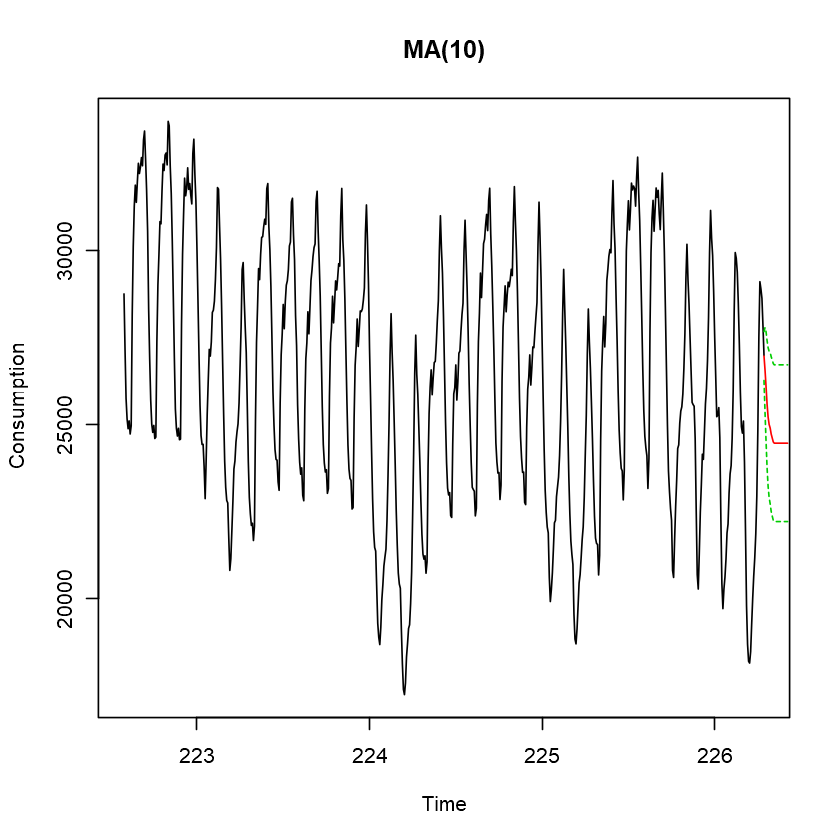

In [202]:
modelarforecast <- predict(modelma, n.ahead = 24)$pred
modelarse <- predict(modelma, n.ahead = 24)$se
ts.plot(ts,ylab = "Consumption",main="MA(10)")
points(modelarforecast*last_trend*last_seasonal, type = "l", col = 2)
points(modelarforecast*last_trend*last_seasonal - 1.96*modelarse*last_trend*last_seasonal, type = "l", col = 3, lty = 2)
points(modelarforecast*last_trend*last_seasonal + 1.96*modelarse*last_trend*last_seasonal, type = "l", col = 3, lty = 2)

Both figure is 24 ahead forecast using the two best models. Red line shows the forecast and green dotted lines are confidence intervals. It is worth to mention MA model gives us constant prediction after a while. The reason is I choose MA(10) model, therefore after 10th prediction it gives constant prediction. Because with the parameter 10, for 24 ahead forecast is not predictable since the nature of MA doesnt allow us. It just gives the same result after a while. With better computation power, better estimates can be achieved.
Moreover, our predictions fitted to data well visually. However, more statistical test should be looked in order to say this is a good fit. Sliding window validation method can be used in order to understand how well our model is going to fit to the unseen data.